<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [99]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
data = pd.read_csv('/content/drive/My Drive/Dataset/BAJAS.txt',delimiter='~')
 
X  = data.iloc[:,:-1].values
Y  = data.iloc[:,8].values
Y = Y[:,np.newaxis]

In [ ]:
#data.info()#
#data.describe()
data

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# 1trim
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,1]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,test_size = 0.2,
                                        random_state = 0,
                                        shuffle      = True
                                    )


#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_test_m1 = logreg.predict(x_test)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))


Precisión Modelo Regresión Logística
0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [104]:
pd.DataFrame(y_predic_train_m1)

,0
0,31
1,31
2,45
3,54
4,26
5,56
6,39
7,42
8,42


In [105]:
y_train

array([[31],
       [39],
       [45],
       [54],
       [26],
       [56],
       [48],
       [35],
       [42]])

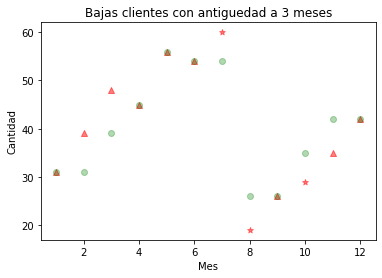

In [107]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_test , y_test , c='red', marker='*', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.scatter(x_test , y_predic_test_m1 , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad a 3 meses')
plt.show()

In [108]:
#Guardamos los resultados
concat_y1, concat_x1 = [],[]

for _ in list(range(len(y_predic_valor))):
  concat_y1.append(y_predic_train_m1[_])
  concat_x1.append(x_train[_])

for _ in list(range(len(y_predic_valor_t))):
  concat_y1.append(y_predic_test_m1[_])
  concat_x1.append(x_test[_])